In [1062]:
# 필요 라이브러리 불러오기
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [1063]:
# 데이터 리사이징
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [1064]:
# 가위 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [1065]:
# 바위 이미지 리사이징
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [1066]:
# 보 이미지 리사이징

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [1067]:
# 데이터 불러오고 각 클래스마다 행렬형태로 변환
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


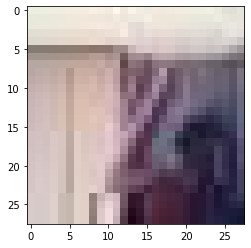

In [1068]:
# 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

In [1069]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_716 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_715 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_717 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_716 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_267 (Flatten)        (None, 800)               0         
_________________________________________________________________
dense_534 (Dense)            (None, 32)                25632     
_________________________________________________________________
dense_535 (Dense)           

Epoch 1/10
10/10 [==============================] - 1s 22ms/step - loss: 47.3358 - accuracy: 0.1700
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 3.6315 - accuracy: 0.4367
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 1.2638 - accuracy: 0.6400
Epoch 4/10
10/10 [==============================] - 0s 18ms/step - loss: 0.8010 - accuracy: 0.6233
Epoch 5/10
10/10 [==============================] - 0s 17ms/step - loss: 0.4238 - accuracy: 0.7733
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2171 - accuracy: 0.9133
Epoch 7/10
10/10 [==============================] - 0s 20ms/step - loss: 0.1763 - accuracy: 0.9533
Epoch 8/10
10/10 [==============================] - 0s 20ms/step - loss: 0.1232 - accuracy: 0.9800
Epoch 9/10
10/10 [==============================] - 0s 20ms/step - loss: 0.1001 - accuracy: 0.9833
Epoch 10/10
10/10 [==============================] - 0s 19ms/step - loss: 0.0853 - accuracy: 0.9833


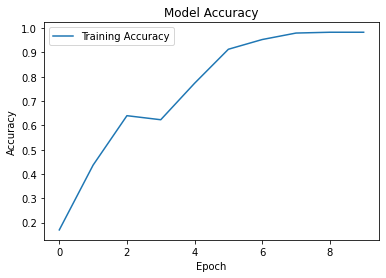

In [1070]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

# 모델 학습에 대한 accuracy 시각화
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

In [1071]:
# 보 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
보 테스트 이미지 resize 완료!


In [1072]:
# 가위 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
가위 테스트 이미지 resize 완료!


In [1073]:
# 바위 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
바위 테스트 이미지 resize 완료!


In [1074]:
# 테스트 데이터 행령 변환
import numpy as np

def load_data(img_path, number_of_data=90):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 90 입니다.
x_test shape: (90, 28, 28, 3)
y_test shape: (90,)


In [1075]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

3/3 - 0s - loss: 1.5365 - accuracy: 0.7333
test_loss: 1.5364809036254883
test_accuracy: 0.7333333492279053


In [1076]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.5226574e-01 2.2139976e-02 2.5594113e-02 1.3995056e-20 1.7523908e-07
 5.1406040e-21 2.1171063e-08 4.1519788e-11 0.0000000e+00 0.0000000e+00]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


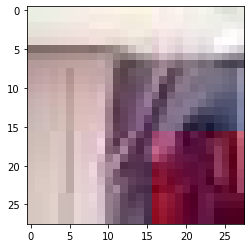

In [1077]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [5.0574854e-02 4.4279810e-07 9.4942462e-01 9.9642853e-30 4.6882917e-08
 5.6323059e-23 3.7113246e-13 2.4649605e-11 0.0000000e+00 0.0000000e+00]
라벨: 1, 예측결과: 2


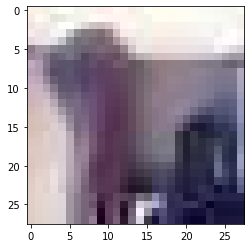

예측확률분포: [2.4668902e-01 4.2534741e-03 7.4905747e-01 5.8595610e-23 1.2073888e-08
 6.4434617e-20 2.5276380e-11 4.8353616e-10 0.0000000e+00 0.0000000e+00]
라벨: 1, 예측결과: 2


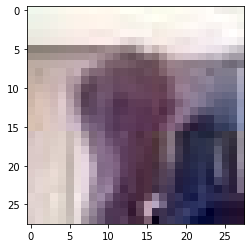

예측확률분포: [3.6508784e-01 1.1373410e-04 6.3479823e-01 2.2248271e-23 1.4018052e-07
 6.7372366e-24 9.8760219e-12 6.3741417e-12 0.0000000e+00 0.0000000e+00]
라벨: 0, 예측결과: 2


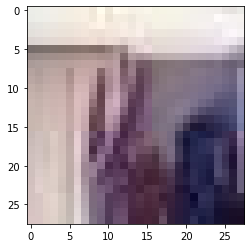

예측확률분포: [2.4668902e-01 4.2534741e-03 7.4905747e-01 5.8595610e-23 1.2073888e-08
 6.4434617e-20 2.5276380e-11 4.8353616e-10 0.0000000e+00 0.0000000e+00]
라벨: 1, 예측결과: 2


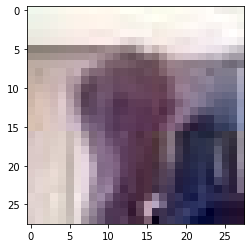

예측확률분포: [4.3641096e-01 2.6861662e-03 5.6090277e-01 2.4624176e-22 8.9418762e-08
 6.5707506e-20 2.0295791e-10 5.0380716e-10 0.0000000e+00 0.0000000e+00]
라벨: 1, 예측결과: 2


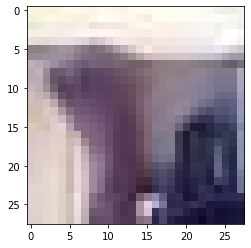

In [1078]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [1079]:
# 바꿔 볼 수 있는 하이퍼파라미터들
from tensorflow.keras import optimizers
n_channel_1=16
n_channel_2=24
n_channel_3=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3))) 
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu')) 
model.add(keras.layers.MaxPool2D(2, 2))


#레이어 하나 더 추가
model.add(keras.layers.Conv2D(n_channel_3, (2,2), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())

#드롭아웃
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# learning rate 추가
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_718 (Conv2D)          (None, 27, 27, 16)        208       
_________________________________________________________________
max_pooling2d_717 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_719 (Conv2D)          (None, 12, 12, 24)        1560      
_________________________________________________________________
max_pooling2d_718 (MaxPoolin (None, 6, 6, 24)          0         
_________________________________________________________________
conv2d_720 (Conv2D)          (None, 5, 5, 32)          3104      
_________________________________________________________________
max_pooling2d_719 (MaxPoolin (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_268 (Flatten)        (None, 128)            